In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import linregress
import sys
import os

In [3]:
#read the data sets
csv_path = "Resources/data.csv"
music_df = pd.read_csv(csv_path)

In [4]:
csv_path = "Resources/data_w_genres.csv"
genre_df = pd.read_csv(csv_path)

In [5]:
#checking if a random artist is on both data sets
genre_df.loc[(genre_df["artists"] == "Louis Armstrong")]

,genres,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count
15222,"['adult standards', 'dixieland', 'harlem renai...",Louis Armstrong,0.790156,0.547011,230558.994728,0.289108,0.088578,0.273495,-12.883371,0.098098,111.638654,0.531922,20.652021,0,1,569


In [6]:
#clean the "artists" column in order to merge the two data sets for further analysis
spec_chars = ["[","]",'"',"'"]
for char in spec_chars:
    music_df['artists'] = music_df['artists'].str.replace(char, '')


In [7]:
#merge cvs with genres and the main date set
merge_genre = music_df.merge(genre_df,on=["artists"],how = "left")

In [8]:
merge_genre.sample(10)

,valence_x,year,acousticness_x,artists,danceability_x,duration_ms_x,energy_x,explicit,id,instrumentalness_x,...,instrumentalness_y,liveness_y,loudness_y,speechiness_y,tempo_y,valence_y,popularity_y,key_y,mode_y,count
9910,0.0556,1971,0.7320,Graham Nash,0.480,230173,0.298,0,28s5iRbX62GZG2ReZTLKDa,0.002950,...,0.001074,0.124661,-14.029639,0.036003,120.627472,0.461867,33.916667,0.0,1.0,36.0
132234,0.0681,1977,0.0151,Ashra,0.243,452600,0.317,0,7xrtYFSpcy2fT6xuyVZzFV,0.964000,...,0.891600,0.155400,-17.940200,0.037280,108.309400,0.268560,32.200000,2.0,1.0,10.0
9611,0.6190,1970,0.0130,Led Zeppelin,0.564,146250,0.932,0,78lgmZwycJ3nzsdgmPPGNx,0.169000,...,0.160079,0.229270,-10.201402,0.062731,118.965653,0.506472,41.404908,2.0,1.0,652.0
168581,0.7960,2010,0.9060,Emilie-Claire Barlow,0.660,280529,0.437,0,6UeCjzfLUBhHOtney81sPn,0.001280,...,0.001347,0.140333,-11.448000,0.041733,101.827000,0.430000,54.666667,8.0,0.0,6.0
36574,0.7250,2010,0.1270,The Black Keys,0.641,203773,0.582,0,6dU5RxthbuaN31bRbEDlNw,0.006320,...,0.121454,0.170069,-6.468404,0.052173,121.413442,0.525750,50.961538,2.0,0.0,104.0
16460,0.5530,2004,0.0811,Montgomery Gentry,0.645,256600,0.693,0,4D8uIY6Wzj7dJDaw0dW0UF,0.000012,...,0.000121,0.194076,-6.739720,0.037004,124.518920,0.537520,44.560000,7.0,1.0,50.0
77826,0.9340,1947,0.8980,Lead Belly,0.522,147252,0.399,0,3nMq6lgQfiBIZyhFfHl0EC,0.000288,...,0.127189,0.204470,-11.944948,0.165290,119.450294,0.734498,3.022157,4.0,1.0,677.0
134723,0.6310,1989,0.7510,"Aram Khachaturian, London Symphony Orchestra, ...",0.414,151760,0.621,0,672qK11fprMeMxDK9Fb0NU,0.873000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
165603,0.8180,1995,0.1030,Los Tucanes De Tijuana,0.833,184880,0.590,0,4FQCg5NJAKn04JHkTMTcaB,0.000353,...,0.000607,0.156400,-6.161245,0.046566,138.011509,0.920566,48.962264,7.0,1.0,106.0
75679,0.8510,1929,0.9950,"Francisco Canaro, Charlo",0.774,181507,0.230,0,6vQNv0ACJrEfJ66gQkyHyY,0.904000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# Create dataframe with only necesary columns
#acousticness,danceability,energy,instrumentalness,valence,popularity,tempo,liveness,loudness,speechiness
year_df = merge_genre[["year","name","artists","popularity_x","genres","acousticness_x","danceability_x","energy_x","instrumentalness_x","valence_x","tempo_x","liveness_x","loudness_x","speechiness_x"]]

In [10]:
year_df.head(20)

,year,name,artists,popularity_x,genres,acousticness_x,danceability_x,energy_x,instrumentalness_x,valence_x,tempo_x,liveness_x,loudness_x,speechiness_x
0,1921,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...","Sergei Rachmaninoff, James Levine, Berliner Ph...",4,NaN,0.9820,0.279,0.2110,0.878000,0.0594,80.954,0.6650,-20.096,0.0366
1,1921,Clancy Lowered the Boom,Dennis Day,5,[],0.7320,0.819,0.3410,0.000000,0.9630,60.936,0.1600,-12.441,0.4150
2,1921,Gati Bali,KHP Kridhamardawa Karaton Ngayogyakarta Hadini...,5,[],0.9610,0.328,0.1660,0.913000,0.0394,110.339,0.1010,-14.850,0.0339
3,1921,Danny Boy,Frank Parker,3,[],0.9670,0.275,0.3090,0.000028,0.1650,100.109,0.3810,-9.316,0.0354
4,1921,When Irish Eyes Are Smiling,Phil Regan,2,[],0.9570,0.418,0.1930,0.000002,0.2530,101.665,0.2290,-10.096,0.0380
5,1921,Gati Mardika,KHP Kridhamardawa Karaton Ngayogyakarta Hadini...,6,[],0.5790,0.697,0.3460,0.168000,0.1960,119.824,0.1300,-12.506,0.0700
6,1921,The Wearing of the Green,John McCormack,4,"['irish ballad', 'vintage classical singing']",0.9960,0.518,0.2030,0.000000,0.4060,66.221,0.1150,-10.589,0.0615
7,1921,"Morceaux de fantaisie, Op. 3: No. 2, Prélude i...",Sergei Rachmaninoff,2,"['classical', 'post-romantic era', 'russian ro...",0.9930,0.389,0.0880,0.527000,0.0731,92.867,0.3630,-21.091,0.0456
8,1921,La Mañanita - Remasterizado,Ignacio Corsini,0,"['tango', 'vintage tango']",0.9960,0.485,0.1300,0.151000,0.7210,64.678,0.1040,-21.508,0.0483
9,1921,Il Etait Syndiqué,Fortugé,0,['vintage chanson'],0.9820,0.684,0.2570,0.000000,0.7710,109.378,0.5040,-16.415,0.3990


In [11]:
#find the average for each index


In [12]:
year_df.acousticness_x.mean()

0.5021147637067079

In [13]:
year_df.danceability_x.mean()

0.5373955347986906

In [14]:
year_df.energy_x.mean()

0.48238883511277697

In [15]:
year_df.instrumentalness_x.mean()

0.16700958082939785

In [16]:
year_df.valence_x.mean()

0.5285872111424981

In [17]:
year_df.tempo_x.mean()

116.86158961752855

In [18]:
year_df.liveness_x.mean()

0.20583865545873456

In [19]:
year_df.loudness_x.mean()

-11.467990038264722

In [20]:
year_df.speechiness_x.mean()

0.09839326235108846

In [21]:
#group by & find the max

In [22]:
#groupby years
max_popularity = year_df.groupby(["year"])["popularity_x"].max()
max_popularity = max_popularity.reset_index()

popular_by_year = max_popularity.merge(year_df,on=["year","popularity_x"],how = "left")

popular_by_year = popular_by_year.sort_values("popularity_x",ascending = False)

popular_by_year

,year,popularity_x,name,artists,genres,acousticness_x,danceability_x,energy_x,instrumentalness_x,valence_x,tempo_x,liveness_x,loudness_x,speechiness_x
113,2020,100,Dakiti,"Bad Bunny, Jhay Cortez",NaN,0.4010,0.731,0.573,0.000052,0.145,109.928,0.113,-10.059,0.0544
112,2019,94,Watermelon Sugar,Harry Styles,"['pop', 'post-teen pop']",0.1220,0.548,0.816,0.000000,0.557,95.390,0.335,-4.209,0.0465
111,2018,89,lovely (with Khalid),"Billie Eilish, Khalid",NaN,0.9340,0.351,0.296,0.000000,0.120,115.284,0.095,-10.109,0.0333
110,2018,89,Lucid Dreams,Juice WRLD,"['chicago rap', 'melodic rap']",0.3490,0.511,0.566,0.000000,0.218,83.903,0.340,-7.230,0.2000
60,1977,89,Dreams - 2004 Remaster,Fleetwood Mac,"['album rock', 'classic rock', 'mellow gold', ...",0.0644,0.828,0.492,0.004280,0.789,120.151,0.128,-9.744,0.0276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14,1932,31,Ma L'Amore No,Lina Termini,['vintage italian pop'],0.9920,0.430,0.116,0.932000,0.511,107.703,0.189,-18.675,0.0471
11,1931,18,La Chambelona,Sexteto Habanero,"['musica tradicional cubana', 'son cubano', 's...",0.9570,0.459,0.867,0.941000,0.292,113.188,0.129,-17.102,0.0475
4,1924,13,Mississippi Mud (feat. Bix Beiderbecke),"Paul Whiteman & His Orchestra, Bix Beiderbecke",NaN,0.8160,0.678,0.395,0.240000,0.832,184.446,0.100,-9.825,0.1330
1,1922,6,Carve,Uli,"['corrido', 'nuevo regional mexicano', 'region...",0.6740,0.645,0.445,0.744000,0.127,104.851,0.151,-13.338,0.4510


In [24]:
#fine the average for the most popular song of each year
popular_by_year.popularity_x.mean()

70.5

In [25]:
#use loc function to find the top ten in each decate
decade_1 = year_df.loc[(year_df["year"]>=1921)&(year_df["year"]<=1930)]
top_ten_1 = decade_1.sort_values("popularity_x",ascending = False)
top_ten_1 = top_ten_1.head(10)
top_ten_1

,year,name,artists,popularity_x,genres,acousticness_x,danceability_x,energy_x,instrumentalness_x,valence_x,tempo_x,liveness_x,loudness_x,speechiness_x
1606,1930,Monster Faladoré,Joe Quartz,55,[],0.811,0.521,0.3640,0.009700,0.377,95.234,0.1430,-10.494,0.0641
1406,1929,Mack the Knife,Louis Armstrong,52,"['adult standards', 'dixieland', 'harlem renai...",0.586,0.673,0.3770,0.000000,0.713,88.973,0.3320,-14.141,0.0697
1206,1928,"Sing, Sing, Sing",Benny Goodman,51,"['adult standards', 'bebop', 'big band', 'jazz...",0.847,0.626,0.7440,0.892000,0.259,113.117,0.1450,-9.189,0.0662
806,1926,Ain't Misbehavin',Fats Waller,49,"['adult standards', 'bebop', 'dixieland', 'har...",0.821,0.515,0.2220,0.001930,0.350,98.358,0.1900,-16.918,0.0575
1607,1930,"Hungarian Rhapsody No. 2 in C-Sharp Minor, S. ...","Franz Liszt, Vladimir Horowitz",48,NaN,0.987,0.349,0.3260,0.886000,0.168,80.233,0.7840,-15.347,0.0551
1207,1928,"Dark Was the Night, Cold Was the Ground",Blind Willie Johnson,47,"['acoustic blues', 'appalachian folk', 'blues'...",0.968,0.394,0.0406,0.045300,0.200,116.117,0.0976,-23.179,0.0440
807,1926,Two Sleepy People,Fats Waller,45,"['adult standards', 'bebop', 'dixieland', 'har...",0.725,0.651,0.0867,0.000065,0.540,87.221,0.1690,-18.882,0.0480
222,1923,Nobody Knows You When You're Down and Out,Bessie Smith,42,"['blues', 'harlem renaissance', 'jazz blues', ...",0.996,0.614,0.0423,0.002930,0.211,89.822,0.1830,-12.033,0.0535
1208,1928,It's Nobody's Fault but Mine,Blind Willie Johnson,42,"['acoustic blues', 'appalachian folk', 'blues'...",0.980,0.676,0.2520,0.000074,0.483,83.901,0.1100,-14.010,0.0390
221,1923,Weather Bird,"Louis Armstrong, Earl Hines",42,NaN,0.984,0.831,0.2620,0.912000,0.901,104.606,0.2040,-12.386,0.0942


In [26]:
decade_2 = year_df.loc[(year_df["year"]>=1931)&(year_df["year"]<=1940)]
top_ten_2 = decade_2.sort_values("popularity_x",ascending = False)
top_ten_2 = top_ten_2.head(10)
top_ten_2

,year,name,artists,popularity_x,genres,acousticness_x,danceability_x,energy_x,instrumentalness_x,valence_x,tempo_x,liveness_x,loudness_x,speechiness_x
2206,1933,All of Me (with Eddie Heywood & His Orchestra),"Billie Holiday, Eddie Heywood",64,NaN,0.972,0.504,0.0644,0.000004,0.403,106.994,0.1740,-14.754,0.0408
3406,1939,"It's Been a Long, Long Time",Harry James,60,"['adult standards', 'big band', 'jazz trumpet'...",0.938,0.271,0.2190,0.000860,0.375,74.680,0.2630,-9.767,0.0310
3407,1939,Moonlight Serenade,Glenn Miller,54,"['adult standards', 'big band', 'easy listenin...",0.862,0.342,0.1260,0.099800,0.147,77.873,0.1460,-11.857,0.0265
3006,1937,Cross Road Blues,Robert Johnson,54,"['acoustic blues', 'blues', 'blues rock', 'del...",0.930,0.675,0.3110,0.000261,0.638,97.159,0.1020,-11.959,0.0525
2208,1933,Tea for Two,Art Tatum,53,"['bebop', 'big band', 'contemporary post-bop',...",0.991,0.358,0.4520,0.864000,0.525,166.973,0.1400,-13.020,0.0347
3551,1939,In the Mood - Live,Glenn Miller,52,"['adult standards', 'big band', 'easy listenin...",0.824,0.463,0.6540,0.917000,0.592,175.204,0.3720,-9.720,0.0659
2209,1933,Gloomy Sunday (with Teddy Wilson & His Orchest...,"Billie Holiday, Teddy Wilson",52,NaN,0.980,0.484,0.0823,0.000002,0.191,127.089,0.1590,-11.273,0.0364
2210,1933,Summertime,Billie Holiday,52,"['adult standards', 'harlem renaissance', 'jaz...",0.903,0.628,0.2260,0.000006,0.608,99.392,0.1710,-14.075,0.0371
3409,1939,Where Did You Sleep Last Night,Lead Belly,52,"['acoustic blues', 'appalachian folk', 'blues'...",0.948,0.570,0.2410,0.022400,0.543,115.352,0.1110,-12.138,0.0473
3408,1939,In the Mood,Glenn Miller,51,"['adult standards', 'big band', 'easy listenin...",0.929,0.624,0.3040,0.173000,0.874,80.582,0.0693,-14.496,0.0822


In [27]:
decade_3 = year_df.loc[(year_df["year"]>=1941)&(year_df["year"]<=1950)]
top_ten_3 = decade_3.sort_values("popularity_x",ascending = False)
top_ten_3 = top_ten_3.head(10)
top_ten_3

,year,name,artists,popularity_x,genres,acousticness_x,danceability_x,energy_x,instrumentalness_x,valence_x,tempo_x,liveness_x,loudness_x,speechiness_x
4006,1942,White Christmas,"Bing Crosby, Ken Darby Singers, John Scott Tro...",76,NaN,0.673,0.317,0.1580,0.353000,0.247,130.503,0.3380,-16.485,0.0381
4607,1945,It's Beginning To Look Like Christmas,Bing Crosby,71,"['adult standards', 'easy listening']",0.770,0.473,0.2120,0.000000,0.576,96.940,0.1360,-15.018,0.0496
5006,1947,Here Comes Santa Claus (Right Down Santa Claus...,Gene Autry,70,"['adult standards', 'cowboy western', 'oklahom...",0.799,0.834,0.3710,0.000000,0.976,96.628,0.2750,-11.990,0.0358
4406,1944,Have Yourself A Merry Little Christmas,Judy Garland,70,"['adult standards', 'hollywood', 'lounge', 'to...",0.970,0.156,0.1840,0.004580,0.107,180.887,0.2600,-14.820,0.0393
4606,1945,Mele Kalikimaka (Merry Christmas),"Bing Crosby, The Andrews Sisters",69,NaN,0.646,0.500,0.2240,0.000000,0.620,202.481,0.2840,-12.431,0.0935
5407,1949,Gymnopédie No. 1,"Erik Satie, Philippe Entremont",67,NaN,0.994,0.469,0.0128,0.937000,0.354,72.765,0.0941,-36.856,0.1190
4608,1945,I'll Be Home For Christmas,Bing Crosby,66,"['adult standards', 'easy listening']",0.281,0.223,0.1460,0.000000,0.176,84.041,0.2560,-16.084,0.0321
4609,1945,God Rest Ye Merry Gentlemen,Bing Crosby,64,"['adult standards', 'easy listening']",0.984,0.466,0.2130,0.000096,0.693,97.075,0.4280,-12.009,0.0448
5406,1949,Twelve Days Of Christmas,"Bing Crosby, The Andrews Sisters",64,NaN,0.926,0.641,0.4130,0.000000,0.834,143.522,0.1910,-5.624,0.0435
5206,1948,"Whatever Will Be, Will Be (Que Sera, Sera) (wi...","Doris Day, Frank DeVol & His Orchestra",62,NaN,0.864,0.416,0.3410,0.000000,0.776,177.229,0.7240,-10.749,0.0391


In [28]:
decade_4 = year_df.loc[(year_df["year"]>=1951)&(year_df["year"]<=1960)]
top_ten_4 = decade_4.sort_values("popularity_x",ascending = False)
top_ten_4 = top_ten_4.head(10)
top_ten_4

,year,name,artists,popularity_x,genres,acousticness_x,danceability_x,energy_x,instrumentalness_x,valence_x,tempo_x,liveness_x,loudness_x,speechiness_x
7406,1959,Let It Snow! Let It Snow! Let It Snow!,Dean Martin,81,"['adult standards', 'easy listening', 'lounge'...",0.912,0.451,0.240,0.000002,0.701,134.009,0.1750,-14.014,0.0351
7606,1960,At Last,Etta James,76,"['adult standards', 'jazz blues', 'soul', 'sou...",0.547,0.274,0.348,0.013300,0.328,87.430,0.3340,-8.631,0.0293
7409,1959,Johnny B. Goode,Chuck Berry,75,"['blues rock', 'classic rock', 'rock', 'rock-a...",0.741,0.534,0.803,0.000061,0.969,167.983,0.3070,-9.129,0.0743
7006,1957,Blue Christmas,Elvis Presley,74,"['rock-and-roll', 'rockabilly']",0.900,0.465,0.270,0.001040,0.580,94.518,0.1450,-16.661,0.0425
7207,1958,Jailhouse Rock,Elvis Presley,73,"['rock-and-roll', 'rockabilly']",0.410,0.647,0.582,0.000002,0.915,167.396,0.0715,-9.538,0.0755
7007,1957,Dream A Little Dream Of Me - Single Version,"Ella Fitzgerald, Louis Armstrong",72,NaN,0.913,0.443,0.104,0.000000,0.394,76.497,0.1910,-17.042,0.1010
7411,1959,Rudolph The Red-Nosed Reindeer,Dean Martin,70,"['adult standards', 'easy listening', 'lounge'...",0.919,0.478,0.201,0.000000,0.857,136.471,0.0854,-16.768,0.0332
7206,1958,Come Fly With Me - Remastered,Frank Sinatra,70,"['adult standards', 'easy listening', 'lounge']",0.845,0.574,0.338,0.000000,0.493,67.008,0.1650,-11.376,0.0420
7607,1960,A Sunday Kind Of Love,Etta James,70,"['adult standards', 'jazz blues', 'soul', 'sou...",0.829,0.421,0.285,0.000002,0.402,85.861,0.2330,-9.430,0.0293
7608,1960,Sleigh Ride,Ella Fitzgerald,69,"['adult standards', 'jazz blues', 'swing', 'vo...",0.764,0.508,0.287,0.000000,0.644,154.759,0.1530,-12.472,0.0523


In [29]:
decade_5 = year_df.loc[(year_df["year"]>=1961)&(year_df["year"]<=1970)]
top_ten_5 = decade_5.sort_values("popularity_x",ascending = False)
top_ten_5 = top_ten_5.head(10)
top_ten_5

,year,name,artists,popularity_x,genres,acousticness_x,danceability_x,energy_x,instrumentalness_x,valence_x,tempo_x,liveness_x,loudness_x,speechiness_x
8406,1964,Rockin' Around The Christmas Tree,Brenda Lee,85,"['adult standards', 'brill building pop']",0.6140,0.589,0.472,0.000000,0.898,67.196,0.5050,-8.749,0.0502
8206,1963,It's the Most Wonderful Time of the Year,Andy Williams,83,"['adult standards', 'brill building pop', 'eas...",0.7660,0.240,0.598,0.000000,0.776,201.629,0.1170,-8.435,0.0369
9407,1969,Here Comes The Sun - Remastered 2009,The Beatles,82,"['beatlesque', 'british invasion', 'classic ro...",0.0339,0.557,0.540,0.002480,0.394,129.171,0.1790,-10.484,0.0347
9406,1969,Fortunate Son,Creedence Clearwater Revival,81,"['album rock', 'classic rock', 'country rock',...",0.2010,0.640,0.663,0.008060,0.663,132.770,0.1520,-7.516,0.0374
9007,1967,Ain't No Mountain High Enough,"Marvin Gaye, Tammi Terrell",80,NaN,0.4300,0.663,0.600,0.000000,0.800,129.991,0.1840,-10.870,0.0320
8207,1963,Sleigh Ride,The Ronettes,80,"['brill building pop', 'classic girl group', '...",0.4030,0.529,0.772,0.000002,0.853,91.751,0.3160,-7.013,0.0287
8606,1965,My Girl,The Temptations,79,"['brill building pop', 'classic soul', 'funk',...",0.6350,0.572,0.418,0.000000,0.694,104.566,0.0961,-10.738,0.0349
9006,1967,Brown Eyed Girl,Van Morrison,79,"['classic rock', 'folk', 'folk rock', 'mellow ...",0.1820,0.491,0.583,0.000000,0.907,150.572,0.4070,-10.964,0.0376
9410,1969,Come Together - Remastered 2009,The Beatles,79,"['beatlesque', 'british invasion', 'classic ro...",0.0302,0.533,0.376,0.248000,0.187,165.007,0.0926,-11.913,0.0393
8806,1966,California Dreamin' - Single Version,The Mamas & The Papas,79,"['brill building pop', 'bubblegum pop', 'class...",0.3520,0.552,0.608,0.000000,0.637,112.367,0.0533,-9.786,0.0345


In [30]:
decade_6 = year_df.loc[(year_df["year"]>=1971)&(year_df["year"]<=1980)]
top_ten_6 = decade_6.sort_values("popularity_x",ascending = False)
top_ten_6 = top_ten_6.head(10)
top_ten_6

,year,name,artists,popularity_x,genres,acousticness_x,danceability_x,energy_x,instrumentalness_x,valence_x,tempo_x,liveness_x,loudness_x,speechiness_x
11006,1977,Dreams - 2004 Remaster,Fleetwood Mac,89,"['album rock', 'classic rock', 'mellow gold', ...",0.06440,0.828,0.492,0.004280,0.789,120.151,0.1280,-9.744,0.0276
11606,1980,Back In Black,AC/DC,84,"['album rock', 'australian rock', 'hard rock',...",0.01100,0.310,0.700,0.009650,0.763,188.386,0.0828,-5.678,0.0470
11406,1979,Highway to Hell,AC/DC,84,"['album rock', 'australian rock', 'hard rock',...",0.06100,0.574,0.913,0.001580,0.423,115.728,0.1560,-4.793,0.1330
10806,1976,Hotel California - 2013 Remaster,Eagles,83,"['album rock', 'classic rock', 'country rock',...",0.00574,0.579,0.508,0.000494,0.609,147.125,0.0575,-9.484,0.0270
10406,1974,Sweet Home Alabama,Lynyrd Skynyrd,82,"['album rock', 'blues rock', 'classic rock', '...",0.18100,0.596,0.605,0.000331,0.886,97.798,0.0863,-12.145,0.0255
11007,1977,The Chain - 2004 Remaster,Fleetwood Mac,82,"['album rock', 'classic rock', 'mellow gold', ...",0.00900,0.545,0.670,0.000822,0.481,151.553,0.0451,-8.810,0.0496
10006,1972,"Rocket Man (I Think It's Going To Be A Long, L...",Elton John,82,"['glam rock', 'mellow gold', 'piano rock', 'so...",0.43200,0.601,0.532,0.000006,0.341,136.571,0.0925,-9.119,0.0286
11008,1977,Mr. Blue Sky,Electric Light Orchestra,81,"['album rock', 'art rock', 'beatlesque', 'bow ...",0.65200,0.388,0.338,0.000004,0.477,177.784,0.2480,-10.054,0.0328
10606,1975,Landslide,Fleetwood Mac,80,"['album rock', 'classic rock', 'mellow gold', ...",0.88300,0.414,0.161,0.000223,0.423,159.375,0.1170,-22.320,0.0318
11610,1980,You Shook Me All Night Long,AC/DC,80,"['album rock', 'australian rock', 'hard rock',...",0.00287,0.532,0.767,0.000513,0.755,127.361,0.3900,-5.509,0.0574


In [31]:
decade_7 = year_df.loc[(year_df["year"]>=1981)&(year_df["year"]<=1990)]
top_ten_7 = decade_7.sort_values("popularity_x",ascending = False)
top_ten_7 = top_ten_7.head(10)
top_ten_7

,year,name,artists,popularity_x,genres,acousticness_x,danceability_x,energy_x,instrumentalness_x,valence_x,tempo_x,liveness_x,loudness_x,speechiness_x
12208,1983,Every Breath You Take,The Police,84,"['album rock', 'art rock', 'classic rock', 'da...",0.543000,0.820,0.452,0.002940,0.740,117.401,0.0714,-9.796,0.0348
12607,1985,Take on Me,a-ha,84,"['album rock', 'classic rock', 'folk rock', 'm...",0.018000,0.573,0.902,0.001250,0.876,84.412,0.0928,-7.638,0.0540
12007,1982,Billie Jean,Michael Jackson,83,"['pop', 'r&b', 'soul']",0.023600,0.920,0.654,0.015800,0.847,117.046,0.0359,-3.051,0.0401
13606,1990,Thunderstruck,AC/DC,83,"['album rock', 'australian rock', 'hard rock',...",0.000147,0.502,0.890,0.011700,0.259,133.520,0.2170,-5.175,0.0364
12806,1986,Livin' On A Prayer,Bon Jovi,83,"['glam metal', 'rock']",0.077800,0.532,0.887,0.000214,0.795,122.511,0.2940,-3.757,0.0335
12006,1982,Africa,TOTO,83,"['album rock', 'classic rock', 'mellow gold', ...",0.257000,0.671,0.373,0.000080,0.732,92.718,0.0481,-18.064,0.0323
12406,1984,Summer Of '69,Bryan Adams,82,"['album rock', 'canadian pop', 'canadian singe...",0.018300,0.508,0.834,0.000000,0.774,139.131,0.0732,-6.205,0.0386
12606,1985,Everybody Wants To Rule The World,Tears For Fears,82,"['dance rock', 'new romantic', 'new wave', 'ne...",0.347000,0.645,0.795,0.003890,0.535,112.067,0.1040,-12.095,0.0527
13006,1987,I Wanna Dance with Somebody (Who Loves Me),Whitney Houston,82,"['dance pop', 'pop', 'urban contemporary']",0.207000,0.709,0.824,0.000307,0.867,118.818,0.0888,-8.824,0.0453
12206,1983,Sweet Dreams (Are Made of This) - Remastered,"Eurythmics, Annie Lennox, Dave Stewart",81,NaN,0.225000,0.692,0.711,0.000000,0.875,125.135,0.1200,-7.498,0.0317


In [32]:
decade_8 = year_df.loc[(year_df["year"]>=1991)&(year_df["year"]<=2000)]
top_ten_8 = decade_8.sort_values("popularity_x",ascending = False)
top_ten_8 = top_ten_8.head(10)
top_ten_8

,year,name,artists,popularity_x,genres,acousticness_x,danceability_x,energy_x,instrumentalness_x,valence_x,tempo_x,liveness_x,loudness_x,speechiness_x
14406,1994,All I Want for Christmas Is You,Mariah Carey,88,"['dance pop', 'pop', 'r&b', 'urban contemporary']",0.16400,0.336,0.627,0.000000,0.350,150.273,0.0708,-7.463,0.0384
15608,2000,In the End,Linkin Park,84,"['alternative metal', 'nu metal', 'post-grunge...",0.00958,0.556,0.864,0.000000,0.400,105.143,0.2090,-5.870,0.0584
15606,2000,Yellow,Coldplay,84,"['permanent wave', 'pop']",0.00239,0.429,0.661,0.000121,0.285,173.372,0.2340,-7.227,0.0281
14006,1992,Jingle Bell Rock,Bobby Helms,83,[],0.64300,0.754,0.424,0.000000,0.806,119.705,0.0652,-8.463,0.0363
13812,1991,Losing My Religion,R.E.M.,82,"['alternative rock', 'classic rock', 'permanen...",0.17900,0.666,0.855,0.000001,0.803,125.639,0.0987,-5.051,0.0295
14206,1993,Creep,Radiohead,82,"['alternative rock', 'art rock', 'melancholia'...",0.01020,0.515,0.430,0.000141,0.104,91.841,0.1290,-9.935,0.0369
14607,1995,Gangsta's Paradise,"Coolio, L.V.",82,NaN,0.06550,0.647,0.514,0.000000,0.387,79.974,0.3980,-10.050,0.0593
15410,1999,Californication,Red Hot Chili Peppers,81,"['alternative rock', 'funk metal', 'funk rock'...",0.00210,0.592,0.767,0.001650,0.328,96.483,0.1270,-2.788,0.0270
13808,1991,Under the Bridge,Red Hot Chili Peppers,81,"['alternative rock', 'funk metal', 'funk rock'...",0.05760,0.559,0.345,0.000105,0.458,84.581,0.1410,-13.496,0.0459
14410,1994,Zombie,The Cranberries,81,"['irish rock', 'pop rock']",0.01540,0.307,0.635,0.004830,0.304,166.973,0.3660,-8.957,0.0339


In [33]:
decade_9 = year_df.loc[(year_df["year"]>=2001)&(year_df["year"]<2010)]
top_ten_9 = decade_9.sort_values("popularity_x",ascending = False)
top_ten_9 = top_ten_9.head(10)
top_ten_9

,year,name,artists,popularity_x,genres,acousticness_x,danceability_x,energy_x,instrumentalness_x,valence_x,tempo_x,liveness_x,loudness_x,speechiness_x
16006,2002,'Till I Collapse,"Eminem, Nate Dogg",84,NaN,0.06220,0.548,0.847,0.000000,0.100,171.447,0.0816,-3.237,0.1860
16009,2002,The Scientist,Coldplay,84,"['permanent wave', 'pop']",0.73100,0.557,0.442,0.000015,0.213,146.277,0.1100,-7.224,0.0243
17207,2008,I'm Yours,Jason Mraz,83,"['acoustic pop', 'neo mellow', 'pop', 'pop rock']",0.59500,0.686,0.457,0.000000,0.718,150.953,0.1050,-8.322,0.0468
16806,2006,Last Christmas - Remastered,Wham!,83,"['dance pop', 'dance rock', 'disco', 'europop'...",0.26200,0.757,0.618,0.000000,0.861,106.856,0.2210,-7.964,0.0282
16008,2002,Without Me,Eminem,83,"['detroit hip hop', 'hip hop', 'rap']",0.00286,0.908,0.669,0.000000,0.662,112.238,0.2370,-2.827,0.0738
16611,2005,Hips Don't Lie (feat. Wyclef Jean),"Shakira, Wyclef Jean",83,NaN,0.28400,0.778,0.824,0.000000,0.756,100.024,0.4050,-5.892,0.0712
16839,2006,Promiscuous,"Nelly Furtado, Timbaland",82,NaN,0.05690,0.808,0.970,0.000061,0.868,114.328,0.1540,-6.098,0.0506
16616,2005,Fix You,Coldplay,82,"['permanent wave', 'pop']",0.16400,0.209,0.417,0.001960,0.124,138.178,0.1130,-8.740,0.0338
16407,2004,Yeah! (feat. Lil Jon & Ludacris),"Usher, Lil Jon, Ludacris",82,NaN,0.01830,0.894,0.791,0.000000,0.583,105.018,0.0388,-4.699,0.1120
16206,2003,Numb,Linkin Park,82,"['alternative metal', 'nu metal', 'post-grunge...",0.00460,0.496,0.863,0.000000,0.243,110.018,0.6390,-4.153,0.0381


In [36]:
decade_10 = year_df.loc[(year_df["year"]>=2011)&(year_df["year"]<2020)]
top_ten_10 = decade_10.sort_values("popularity_x",ascending = False)
#top_ten_10 = top_ten_10.head(10)
top_ten_10

,year,name,artists,popularity_x,genres,acousticness_x,danceability_x,energy_x,instrumentalness_x,valence_x,tempo_x,liveness_x,loudness_x,speechiness_x
19407,2019,Watermelon Sugar,Harry Styles,94,"['pop', 'post-teen pop']",0.12200,0.5480,0.816,0.000000,0.5570,95.390,0.3350,-4.209,0.0465
19426,2019,Breaking Me,"Topic, A7S",92,NaN,0.22300,0.7890,0.720,0.000000,0.6640,122.031,0.1290,-5.652,0.2180
19413,2019,Someone You Loved,Lewis Capaldi,91,"['pop', 'uk pop']",0.75100,0.5010,0.405,0.000000,0.4460,109.891,0.1050,-5.679,0.0319
19406,2019,Sofia,Clairo,90,"['bedroom pop', 'boston indie']",0.59800,0.7440,0.619,0.003720,0.6410,112.997,0.2310,-9.805,0.0390
19443,2019,Memories,Maroon 5,89,"['pop', 'pop rock']",0.83700,0.7640,0.320,0.000000,0.5750,91.019,0.0822,-7.209,0.0546
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154521,2015,Uno - Koen Groeneveld Backtrack Remix,"Alex Young, Koen Groeneveld",0,NaN,0.01510,0.8500,0.705,0.854000,0.4040,126.004,0.0882,-4.274,0.0438
154522,2015,Majin Power - Mix Cut,Juyen Sebulba,0,['electronic trap'],0.12900,0.8360,0.973,0.680000,0.5170,133.772,0.4290,-6.629,0.1180
154523,2015,Fuhren Ohne Hinzusehen,Enkraft,0,[],0.00644,0.6500,0.886,0.848000,0.1210,124.996,0.1300,-7.314,0.0432
154524,2016,Watch Out - Max Lean & Avaro Remix,"The Disco Boys, Cuebrick, Max Lean, Avaro",0,NaN,0.00169,0.6970,0.741,0.000022,0.3340,127.948,0.1370,-2.976,0.0420


In [37]:
#relationship between each columns and the popularity - find the corelation for each one
#graphes, and maybe function
#clean genres
#genre counts each dacade
#graphes for numbers change in genre (bar)
#(watch the matplotlib viedeos first)

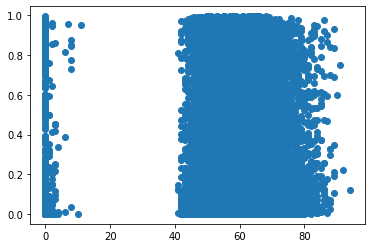

In [54]:
#line plot to see the relationship
plt.scatter(top_ten_10['popularity_x'],top_ten_10['acousticness_x'])
plt.show()


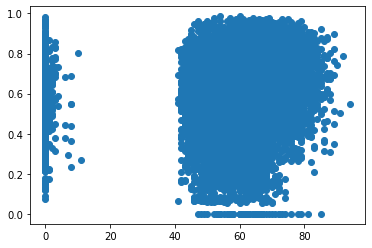

In [57]:
plt.scatter(top_ten_10['popularity_x'],top_ten_10['danceability_x'])
plt.show()


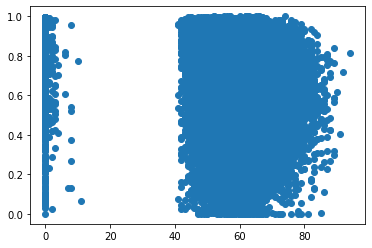

In [58]:
plt.scatter(top_ten_10['popularity_x'],top_ten_10['energy_x'])
plt.show()




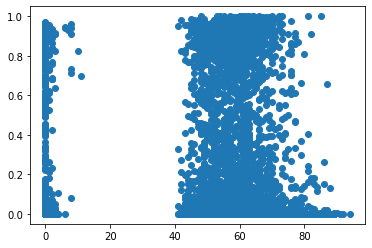

In [59]:
plt.scatter(top_ten_10['popularity_x'],top_ten_10['instrumentalness_x'])
plt.show()


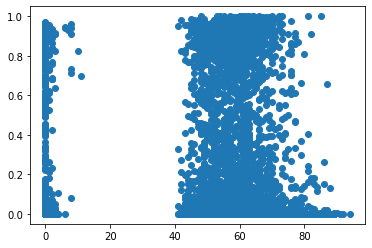

In [60]:
plt.scatter(top_ten_10['popularity_x'],top_ten_10['instrumentalness_x'])
plt.show()


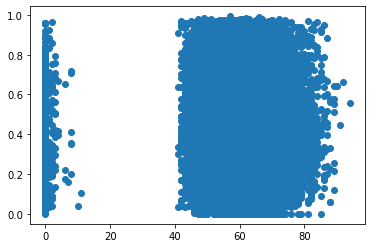

In [61]:
plt.scatter(top_ten_10['popularity_x'],top_ten_10['valence_x'])
plt.show()


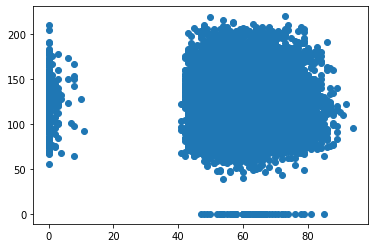

In [62]:
plt.scatter(top_ten_10['popularity_x'],top_ten_10['tempo_x'])
plt.show()


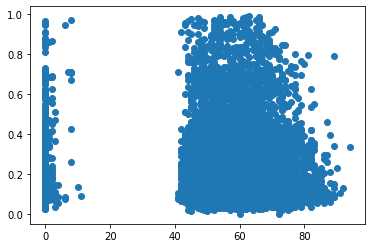

In [63]:
plt.scatter(top_ten_10['popularity_x'],top_ten_10['liveness_x'])
plt.show()



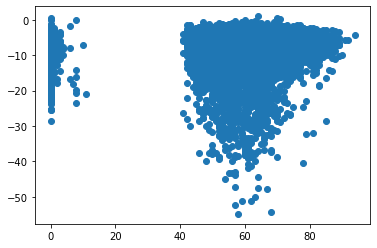

In [64]:
plt.scatter(top_ten_10['popularity_x'],top_ten_10['loudness_x'])
plt.show()


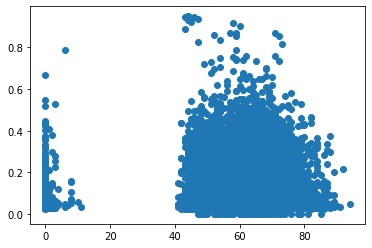

In [65]:
plt.scatter(top_ten_10['popularity_x'],top_ten_10['speechiness_x'])
plt.show()


In [48]:
#number of production of each year
#which year has the most popular songs